In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from IPython.display import Image

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
def prepare_image(file):
    img_path = '/content/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Cute-Panda-Bears-animals-34916401-1455-1114.jpg to Cute-Panda-Bears-animals-34916401-1455-1114.jpg


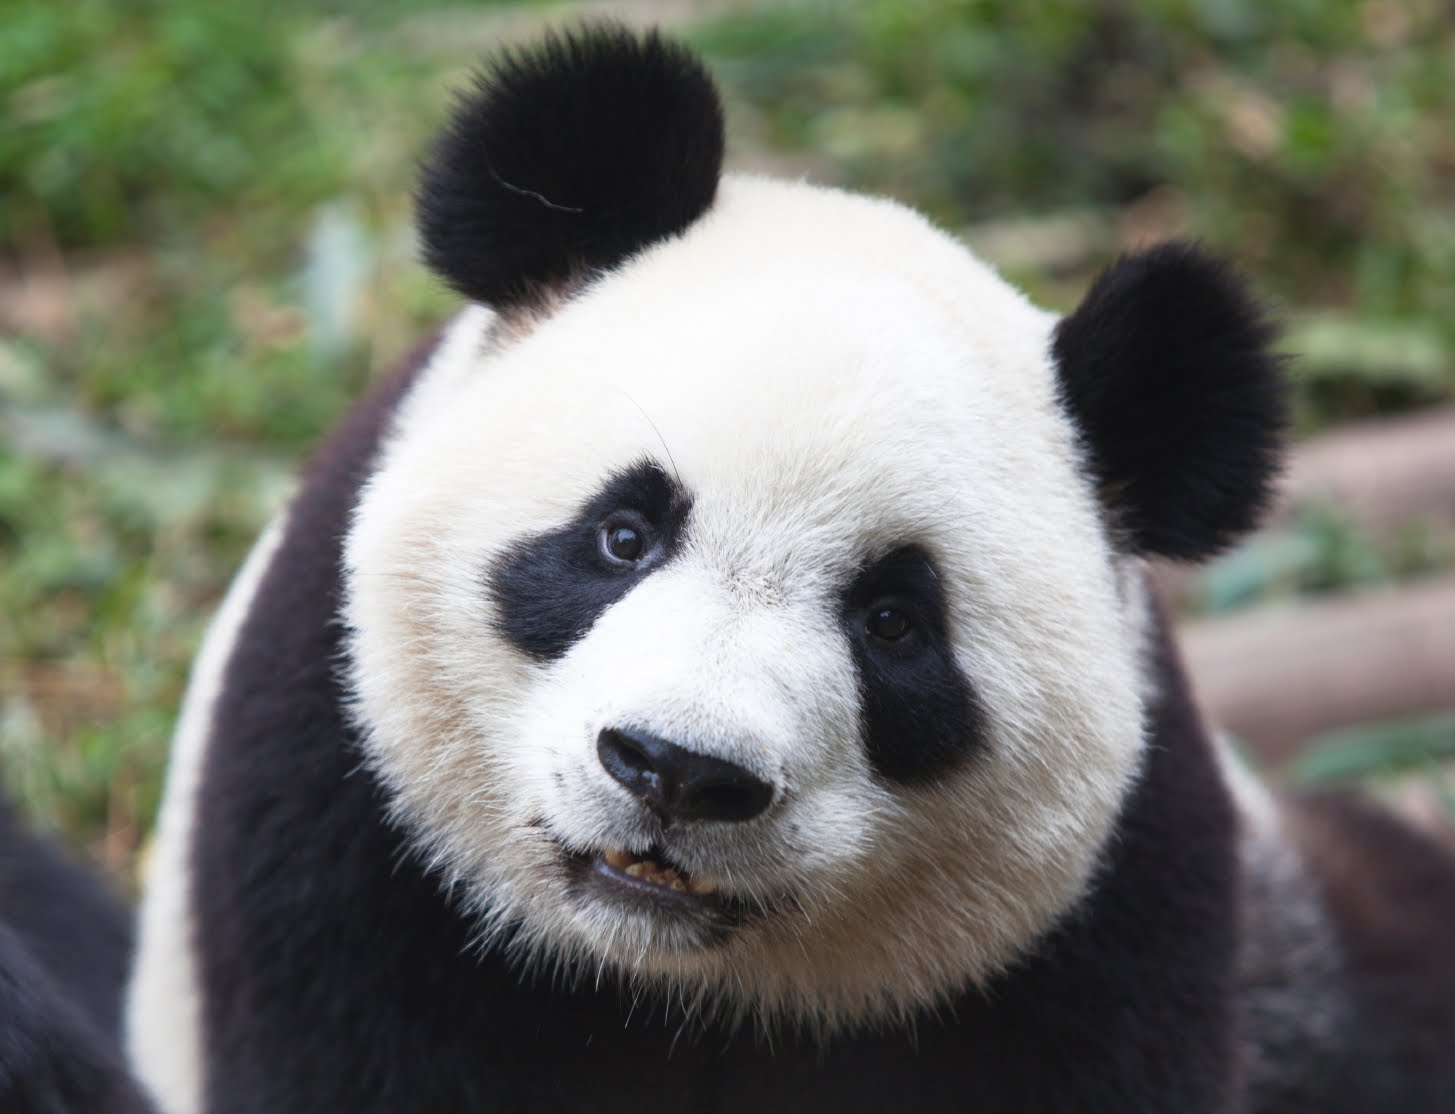

In [ ]:
Image(filename='/content/Cute-Panda-Bears-animals-34916401-1455-1114.jpg', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('Cute-Panda-Bears-animals-34916401-1455-1114.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 1s 1s/step


In [ ]:
from tensorflow.keras.applications import imagenet_utils
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.9994299),
  ('n02132136', 'brown_bear', 0.00023153049),
  ('n02133161', 'American_black_bear', 0.0001447755),
  ('n02134084', 'ice_bear', 4.2945438e-05),
  ('n02437616', 'llama', 2.6485359e-05)]]

In [ ]:
img=cv2.imread("/content/Cute-Panda-Bears-animals-34916401-1455-1114.jpg",0)
img=cv2.resize(img,(224,224))
img

array([[ 94,  94,  96, ..., 101,  93,  82],
       [100, 102, 101, ..., 101,  92,  80],
       [104, 105, 106, ...,  97,  88,  79],
       ...,
       [ 27,  27,  26, ...,  39,  39,  40],
       [ 27,  25,  27, ...,  38,  39,  39],
       [ 28,  26,  28, ...,  38,  39,  39]], dtype=uint8)

In [ ]:
img.shape

(224, 224)

In [ ]:
gauss_noise=np.zeros((224,224),dtype=np.uint8)
cv2.randn(gauss_noise,64,10)
gauss_noise=(gauss_noise*5).astype(np.uint8)

In [ ]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

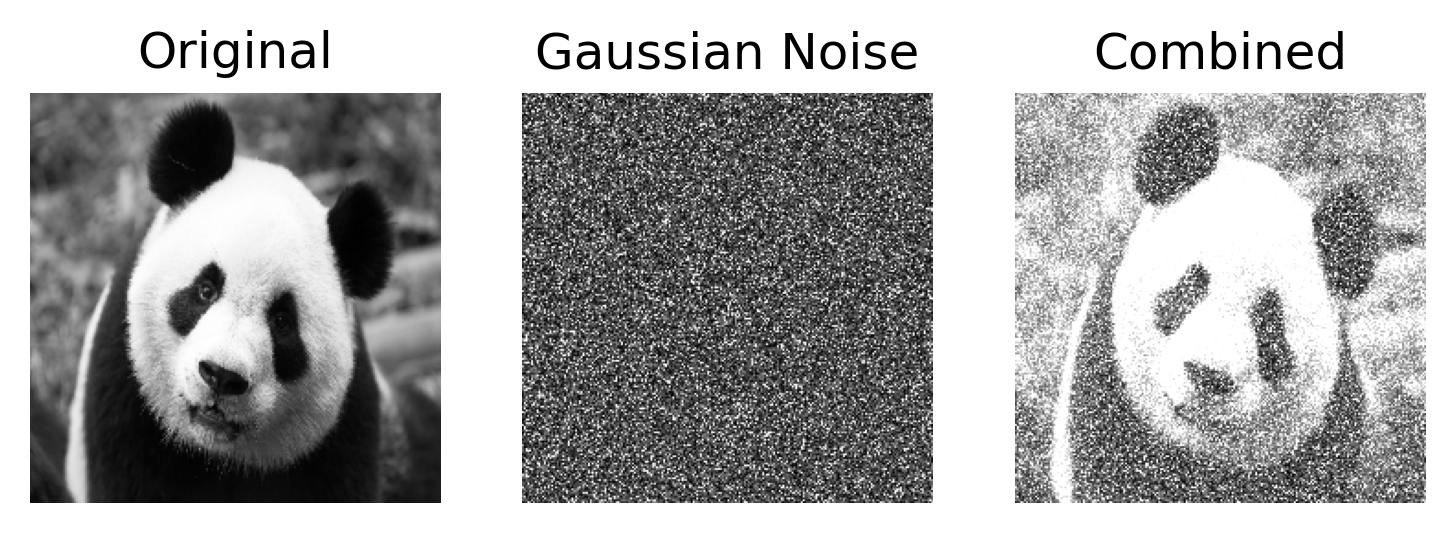

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [ ]:
cv2.imwrite('/content/panda.jpg',gn_img)

True

In [ ]:
preprocessed_image = prepare_image('panda.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 61ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04254680', 'soccer_ball', 0.51803744),
  ('n02510455', 'giant_panda', 0.11536193),
  ('n04409515', 'tennis_ball', 0.04088075),
  ('n02110341', 'dalmatian', 0.026150098),
  ('n02096585', 'Boston_bull', 0.022700064)]]

In [ ]:
# Original Predictions : Giant Panda
# After adding Gaussian Noise : Soccer Ball

In [ ]:
img3=cv2.imread("/content/panda.jpg",0)

In [ ]:
img3

array([[123, 163, 165, ..., 116, 206, 159],
       [118, 216, 200, ..., 129, 254, 165],
       [208, 220, 255, ..., 154, 182, 190],
       ...,
       [113, 148,  85, ..., 143, 142, 135],
       [149,  94, 146, ..., 165, 255, 192],
       [ 48,  79,  87, ..., 156,  83, 239]], dtype=uint8)

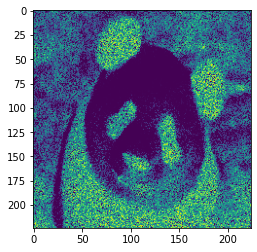

In [ ]:
inverted_image = cv2.bitwise_not(img3)
plt.imshow(inverted_image)

In [ ]:
cv2.imwrite('/content/panda2.jpg',inverted_image)
img4=cv2.imread("/content/panda2.jpg",0)
img4=cv2.resize(img4,(224,224))

In [ ]:
preprocessed_image = prepare_image('panda2.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 63ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02480855', 'gorilla', 0.12074071),
  ('n01496331', 'electric_ray', 0.056987986),
  ('n02104365', 'schipperke', 0.05288136),
  ('n02105056', 'groenendael', 0.04804316),
  ('n02124075', 'Egyptian_cat', 0.040223535)]]

In [ ]:
# Original Predictions : Giant Panda
# After adding Gaussian Noise : Soccer Ball
# After inverting the image : Gorilla

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False

decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [ ]:
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [ ]:
image_raw = tf.io.read_file('/content/Cute-Panda-Bears-animals-34916401-1455-1114.jpg')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 66ms/step


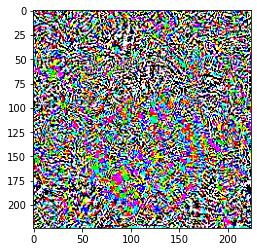

In [ ]:
image_probs = mobile.predict(image)
panda_index = 208
label = tf.one_hot(panda_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  

In [ ]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence*100))
  plt.show()

1/1 [==============================] - 0s 62ms/step


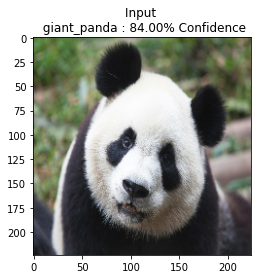

1/1 [==============================] - 0s 71ms/step


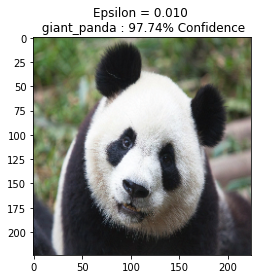

1/1 [==============================] - 0s 64ms/step


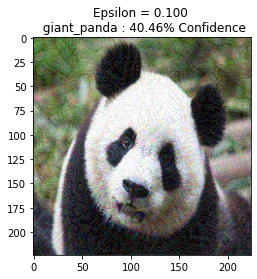

1/1 [==============================] - 0s 59ms/step


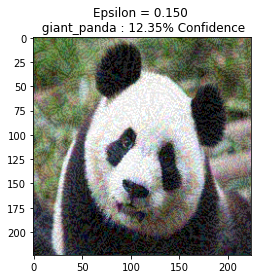

1/1 [==============================] - 0s 58ms/step


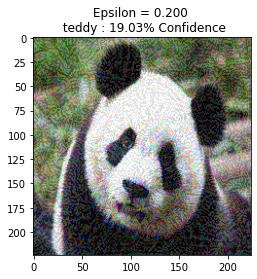

1/1 [==============================] - 0s 60ms/step


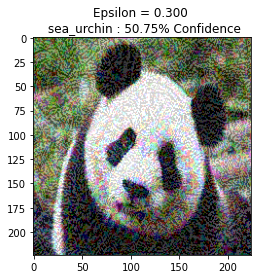

1/1 [==============================] - 0s 59ms/step


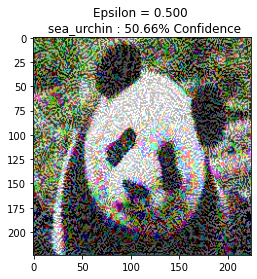

In [ ]:
epsilons = [0, 0.01, 0.1, 0.15, 0.2 , 0.3, 0.5]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

In [ ]:
# Confidence decreases as epsilon value increases 

# Above epsilon 0.2 the image is misclassified